In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy 
import nltk
from spacy import displacy

In [2]:
df_raw = pd.read_csv('../trump_tweets.csv')

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20761 entries, 0 to 20760
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   source                   20761 non-null  object 
 1   id_str                   20761 non-null  int64  
 2   text                     20761 non-null  object 
 3   created_at               20761 non-null  object 
 4   retweet_count            20761 non-null  int64  
 5   in_reply_to_user_id_str  2442 non-null   float64
 6   favorite_count           20761 non-null  int64  
 7   is_retweet               20761 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(3)
memory usage: 1.1+ MB


In [3]:
df_raw.sample(10)

,source,id_str,text,created_at,retweet_count,in_reply_to_user_id_str,favorite_count,is_retweet
19436,Twitter for iPhone,901531320052051971,THANK YOU to all of the great volunteers helpi...,2017-08-26T19:46:30Z,17056,NaN,74246,False
11041,Twitter Web Client,484029282642300928,Make your NYC getaway memorable -- @TrumpNewYo...,2014-07-01T17:42:28Z,14,NaN,30,False
12543,Twitter for Android,668075477547003904,"Heading to Birmingham, Alabama, and a massive ...",2015-11-21T14:36:20Z,1183,NaN,3778,False
10073,Twitter Web Client,531922043705753602,A single Ebola carrier infects 2 others at a m...,2014-11-10T21:31:12Z,256,NaN,386,False
3062,Twitter Web Client,225582661236817922,"According to a @gallupnews poll, over 60% thin...",2012-07-18T13:27:52Z,126,NaN,10,False
16736,Twitter for Android,747191624535511040,Crooked Hillary Clinton got Brexit wrong. I sa...,2016-06-26T22:15:40Z,5482,NaN,17418,False
9165,Twitter Web Client,294921145973628929,@DanSchreibs Dope!,2013-01-25T21:34:15Z,58,159190987.0,51,False
3727,Twitter Web Client,183198858728316928,I'll be on @Foxandfriends Monday at 7:30 AM.,2012-03-23T14:29:46Z,19,NaN,7,False
502,TweetDeck,127080660216188928,"Bob Beckel, a commentator for FOX is bad for t...",2011-10-20T17:56:05Z,90,NaN,4,False
9327,Twitter Web Client,293732148337332224,Obama’s speech indicates he wants to change th...,2013-01-22T14:49:36Z,169,NaN,67,False


In [4]:
nlp = spacy.load('en_core_web_trf')

/workspaces/NLP_Task/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# Tokenization 

sentence = nlp.tokenizer('I live in Hell.')

print(f"Number of tokens: {len(sentence)}")

Number of tokens: 5


In [7]:
for word in sentence:
    print(word)

I
live
in
Hell
.


In [10]:
# POS (Part-of-speech) tagging

sentence_2 = nlp('The most populated city in Hell is Bogotá.')

for token in sentence_2:
    print(token.text, token.pos_)

The DET
most ADV
populated ADJ
city NOUN
in ADP
Hell PROPN
is AUX
Bogotá PROPN
. PUNCT


In [ ]:
# DET: Determiner
# ADV: Adverb
# ADJ: Adjective
# NOUN
# ADP: Adverb preposition
# PROPN: Proper Noun
# AUX: Auxiliar (to be, to have, will, should)
# PUNCT: Punctuation

In [11]:
# DEP (Depence parsing)
for token in sentence_2:
    print(token.text, token.dep_)

The det
most advmod
populated amod
city nsubj
in prep
Hell pobj
is ROOT
Bogotá attr
. punct


In [ ]:
# det: determiner
# advmod: Adverbial modifier
# amod: Adjective modifier
# nsubj: Nominal subject
# prep: Preposition
# pobj: Proper Object
# ROOT
# attr: Attribute
# punct: Punctuation

In [13]:
displacy.render(sentence_2)

In [15]:
df_processed = df_raw.copy()

df_processed = df_processed.drop(['id_str', 'is_retweet', 'in_reply_to_user_id_str'], axis=1)

In [32]:
df_processed = df_raw.copy()
df_processed = df_processed.drop(['id_str','is_retweet','in_reply_to_user_id_str'],axis=1)
df_processed['created_at'] = pd.to_datetime(df_processed.created_at)
df_processed.source = pd.Categorical(df_processed.source)
df_processed = df_processed.loc[(df_processed.created_at >= '2015-06-17') & (df_processed.created_at <= '2016-11-08')]
df_processed.created_at += pd.Timedelta(-5,unit='h')
df_processed = df_processed.loc[(df_processed.source.str.contains('iPhone')) | (df_processed.source.str.contains('Android'))]
df_processed.source = df_processed.source.cat.remove_unused_categories()
df_processed.to_csv('../trump_tweets_processed.csv')

In [33]:
df = df_processed.copy()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3946 entries, 12072 to 18506
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   source          3946 non-null   category           
 1   text            3946 non-null   object             
 2   created_at      3946 non-null   datetime64[ns, UTC]
 3   retweet_count   3946 non-null   int64              
 4   favorite_count  3946 non-null   int64              
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(1)
memory usage: 158.0+ KB


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
retweet_count,3946.0,5839.465281,6156.818896,61.0,2013.25,4162.5,7807.25,168765.0
favorite_count,3946.0,15666.982767,14650.408743,167.0,5350.00,11981.5,21527.00,297281.0


In [36]:
df.sample(10)

,source,text,created_at,retweet_count,favorite_count
12350,Twitter for iPhone,"Despite my great respect for King Abdullah II,...",2015-12-08 19:16:23+00:00,1940,4408
17293,Twitter for iPhone,Thank you Delaware! #Trump2016 \n#MakeAmericaG...,2016-04-23 14:30:58+00:00,3311,9189
18022,Twitter for Android,"A very big thank you to Bill Donohue, head of ...",2016-02-13 11:43:32+00:00,1362,4232
17639,Twitter for Android,Bernie Sanders is lying when he says his disru...,2016-03-13 06:48:44+00:00,13754,34539
17080,Twitter for Android,I gave a woman named Barbara Res a top N.Y. co...,2016-05-16 22:46:35+00:00,3979,12880
15867,Twitter for iPhone,'How Trump won over a bar full of undecideds a...,2016-09-27 07:55:31+00:00,8404,18666
18142,Twitter for Android,Great job on @donlemon tonight @kayleighmcenan...,2016-02-03 00:12:23+00:00,1647,5286
18257,Twitter for iPhone,Love making correct predictions. National Revi...,2016-01-23 20:39:28+00:00,1718,4292
15514,Twitter for iPhone,If elected POTUS - I will stop RADICAL ISLAMIC...,2016-10-20 10:52:38+00:00,16317,38250
17045,Twitter for Android,"I said that Crooked Hillary Clinton is ""not qu...",2016-05-20 04:40:37+00:00,5476,17109


In [37]:
df.source.value_counts()

source
Twitter for iPhone     2099
Twitter for Android    1847
Name: count, dtype: int64

In [38]:
df = df[(df.source == 'Twitter for iPhone') | (df.source == 'Twitter for Android')].copy()

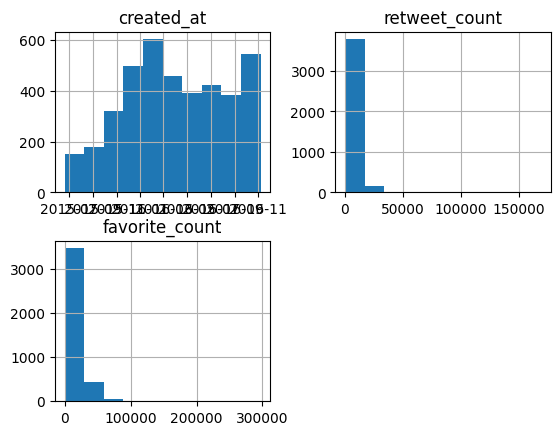

In [39]:
df.hist()
plt.show()

/tmp/ipykernel_7678/980720819.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['source','hour'])
/tmp/ipykernel_7678/980720819.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .assign(rate=lambda df: df['count']/df.groupby('source')['count'].sum())
/workspaces/NLP_Task/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspaces/NLP_Task/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: 

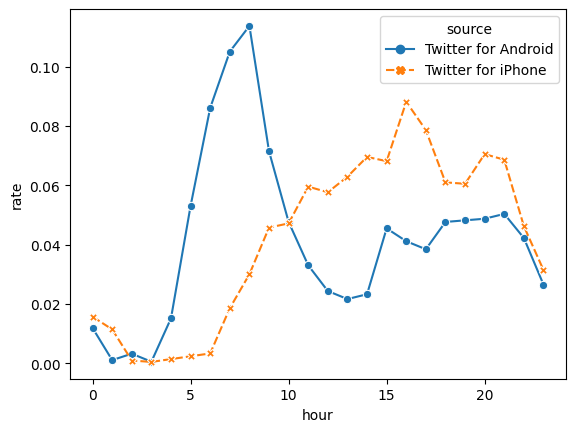

In [40]:
df_plot = (df
           .assign(hour=df.created_at.dt.hour)
           .groupby(['source','hour'])
           .agg(count=('source','count'))
           .assign(rate=lambda df: df['count']/df.groupby('source')['count'].sum())
           .reset_index()
)

sns.lineplot(data=df_plot, x='hour', y='rate', hue='source', markers=True, style='source')
plt.show()

In [41]:
df.sort_values(by='retweet_count', ascending=False)[['text', 'retweet_count']][:10]

,text,retweet_count
16875,How long did it take your staff of 823 people ...,168765
17183,Happy #CincoDeMayo! The best taco bowls are ma...,85465
15333,MAKE AMERICA GREAT AGAIN!,59098
15758,Here is my statement. https://t.co/WAZiGoQqMQ,51891
16548,Such a great honor to be the Republican Nomine...,41616
15340,If Obama worked as hard on straightening out o...,41479
15827,For those few people knocking me for tweeting ...,40850
15756,The media and establishment want me out of the...,40772
16583,I am pleased to announce that I have chosen Go...,38782
16848,Is President Obama going to finally mention th...,38456
